## Jonathan Bunch

10 October 2021

Bellevue University

DSC550-T301

---

I happened across an interesting data set that seemed relevant to me as a Disney employee—the total profits from each Disney film.  I was curious to see if general societal measures could be used a predictor for these movie profits.

It seems reasonable to assume that the overall health and prosperity of a society—per capita income, unemployment rates, health measures, and so on—would have some sort of impact on the desire of individuals to visit the theater.  Disney movies in particular have a certain connotation; they are generally thought of as family friendly and often taking the form of animation.

What societal factors could an entertainment manufacturer, such as Disney, use to predict the success of a new product?  Do factors such as unemployment rate have a measurable impact on the overall success of movie premiers?  What about factors relating to children, such as fertility rate?

I will explore three data sets in this analysis: the Disney movie profits, yearly U.S. unemployment rate data, and a dataset that includes yearly income, fertility, and mortality data.  These data will need further cleaning and reorganization before I can continue with deeper analysis, but, for now, I will attempt to load the data sets and perform some basic graphical EDA.

In [1]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data sets.
disney_raw = pd.read_csv("disney_movies_total_gross.csv")
unemp_raw = pd.read_csv("USUnemployment.csv")
mort_inc_raw = pd.read_csv("MortalityFertilityIncome.csv")

In [4]:
# Let's take a look at the data sets.
disney_raw.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [5]:
unemp_raw.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1,1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
2,1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3
3,1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1
4,1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7


In [6]:
mort_inc_raw.head()

,Country Name,Country Code,Region,m1970,m1971,m1972,m1973,m1974,m1975,m1976,...,i2007,i2008,i2009,i2010,i2011,i2012,i2013,i2014,i2015,i2016
0,Aruba,ABW,Latin America & Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,"204,8",201,197,"193,1","188,8","184,7","180,6",...,"331,3254993","331,2271678","395,5679021","486,9793222","535,3307235","590,4566662","559,223161","548,5265822","494,2921982","489,7756091"
2,Angola,AGO,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"629,2704433","251,732843","902,6093382","1095,241414","1219,032021","1492,119826","1853,506007","2091,133487","2062,581538","1777,44841"
3,Albania,ALB,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"3343,591615","3961,319155","3622,890286","3530,054028","3850,766176","3641,192766","3866,501647","3937,222372","3458,725714","3606,903851"
4,Andorra,AND,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# We can at least filter this data set down to U.S. data.
mort_inc_us = mort_inc_raw[mort_inc_raw['Country Name'] == "United States"]
mort_inc_us.head()

,Country Name,Country Code,Region,m1970,m1971,m1972,m1973,m1974,m1975,m1976,...,i2007,i2008,i2009,i2010,i2011,i2012,i2013,i2014,i2015,i2016
203,United States,USA,North America,"19,9","19,1","18,3","17,5","16,7",16,"15,2",...,"40594,21177","40369,26202","39379,54994","40903,86626","42607,52741","44582,33345","45548,28824","47344,28554","49058,0894","49725,78053"


We can see that the time aspect of these data sets will need some work. Also, the final data set actually has only three variables with an observation for each year--it will need some serious re-organization.

### Visualizations

I will start with some histograms for the Disney movie profit features.

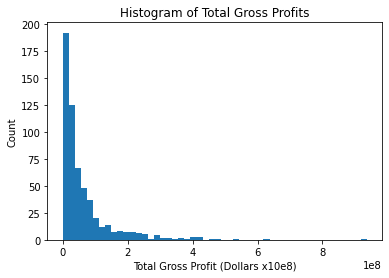

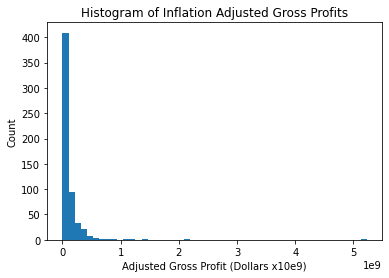

In [8]:
# Histogram of total profits of Disney movies.
plt.hist(x=disney_raw.total_gross, bins=50)
plt.title("Histogram of Total Gross Profits")
plt.xlabel("Total Gross Profit (Dollars x10e8)")
plt.ylabel("Count")
plt.show()

# Histogram of adjusted gross profits of Disney movies.
plt.hist(x=disney_raw.inflation_adjusted_gross, bins=50)
plt.title("Histogram of Inflation Adjusted Gross Profits")
plt.xlabel("Adjusted Gross Profit (Dollars x10e9)")
plt.ylabel("Count")
plt.show()

We can see from these histograms that the profit and adjusted profit display a similar shape of distribution. These plots also reveal several outliers that will need further investigation.

Next, I will create bar plots of U.S. unemployment rate for January and June of each year.

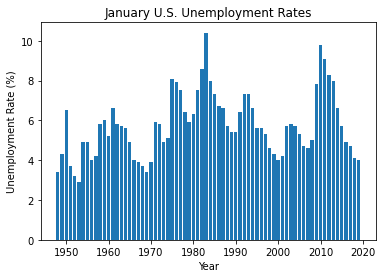

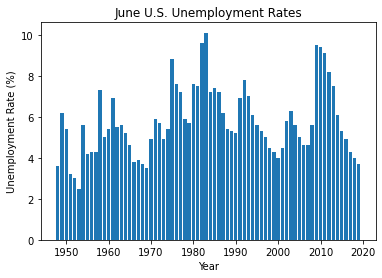

In [9]:
# Bar plot of January U.S. unemployment rates by year.
plt.bar(x=unemp_raw.Year, height=unemp_raw.Jan)
plt.title("January U.S. Unemployment Rates")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# Bar plot of June U.S. unemployment rates.
plt.bar(x=unemp_raw.Year, height=unemp_raw.Jun)
plt.title("June U.S. Unemployment Rates")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

These plots allow us to compare the beginning- and mid-year unemployment rates for each year.  We can see that the overall distribution follows a similar pattern, but there are significant differences in some years.